In [56]:
import pandas as pd

# Import dataset
dataset = pd.read_csv('Customers Cluster.csv')
dataset.head()

,ID,Gender,Age,Income,Spending
0,1,Female,47,600240,0.16
1,2,Male,60,150060,0.04
2,3,Male,63,240096,0.51
3,4,Male,48,270108,0.46
4,5,Female,35,105042,0.35


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        200 non-null    int64  
 1   Gender    200 non-null    object 
 2   Age       200 non-null    int64  
 3   Income    200 non-null    int64  
 4   Spending  200 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [58]:
# Mengecek jumlah nilai yang hilang (missing value) dalam setiap kolom DataFrame
dataset.isna().sum()

ID          0
Gender      0
Age         0
Income      0
Spending    0
dtype: int64

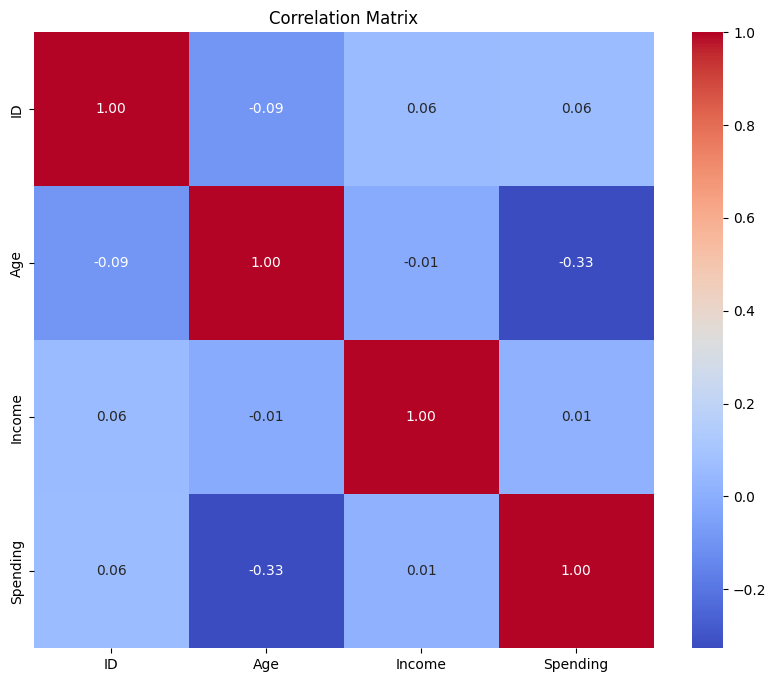

In [59]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Exclude non-numeric column dari ecorrelation matrix
numeric_cols = dataset.select_dtypes(include=[np.number]).columns
correlation_matrix = dataset[numeric_cols].corr()

# Plot heatmap untu matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [62]:
# Split data menjadi features (X) dan target variable (y)
x = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, 1].values

IndexingError: Too many indexers

In [61]:
# Membagi data ke test dan training set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: could not convert string to float: 'Male'

In [47]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize ANN
regression_model = Sequential()

# Add input layer and hidden layers
regression_model.add(Dense(units=10, kernel_initializer='uniform', activation='relu'))
regression_model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# Add output layer
regression_model.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

# Compile the model for regression
regression_model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to training data
regression_model.fit(X_train, y_train, batch_size=8, epochs=100)

# Predict on test data
y_pred = regression_model.predict(X_test)

Epoch 1/100


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3607.7883
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3652.3018 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3378.7715 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3860.4795 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3642.1777 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3645.0950 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3752.9675 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3430.8237 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3512.6226 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3757.6956 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3479.9053 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3390.6396 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3584.2026 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3270.8696 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE
rmse_modified = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae_modified = mean_absolute_error(y_test, y_pred)

# Calculate R^2
r_squared = r2_score(y_test, y_pred)

# Print modified metrics
print("Root Mean Square Error (RMSE):", rmse_modified)
print("Mean Absolute Error (MAE):", mae_modified)
print("R-squared (R^2):", r_squared)

Root Mean Square Error (RMSE): 40.93333272599899
Mean Absolute Error (MAE): 36.614974117279054
R-squared (R^2): -3.228593095238592


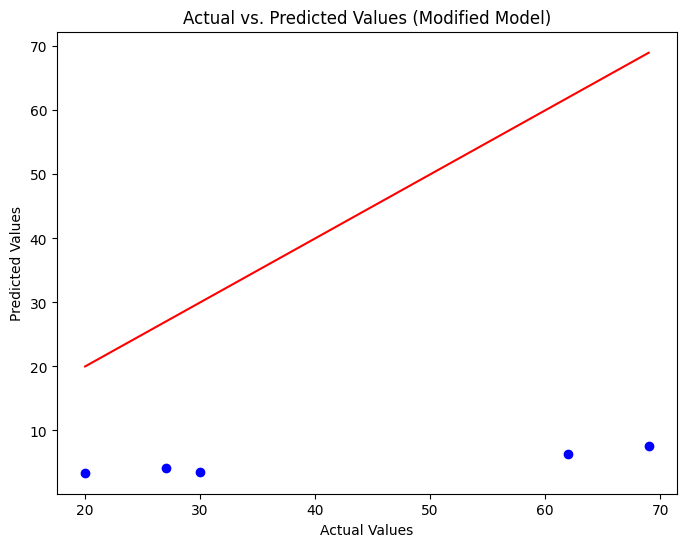

In [55]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
plt.title('Actual vs. Predicted Values (Modified Model)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
